In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

from matplotlib.ticker import FuncFormatter

In [2]:
import pandas as pd
import os

In [3]:
NU = 6

dir_sim_ = './simulations'
dir_tr_input_ = './transformed_input'

udl_distrib = pd.read_csv(os.path.join(dir_sim_,'nu_eq_%i.csv' % NU), header=0, index_col=0)
members_pos = pd.read_csv(os.path.join(dir_tr_input_, 'positions.csv'), header=0, index_col=0)

loss_and_profit = members_pos.dot(udl_distrib).T

In [4]:
labelsize = 15

# Underlyings correlation

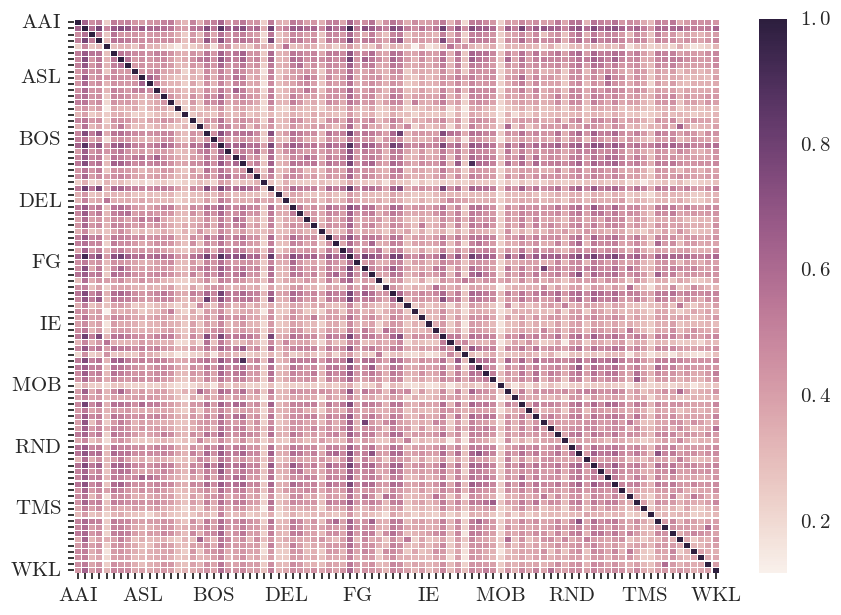

In [5]:
labels = udl_distrib.T.columns

def label_chooser(index):
    if index == 0:
        return True
    
    if (i + 1) % 10 == 0:
        return True
    
    return False

labels = [r'$\rm{%s}$' % lab if label_chooser(i) else '' for i, lab in enumerate(labels)]

corr = udl_distrib.T.corr()

f, ax = plt.subplots()

def cbar_fmt(x, pos):
    return r'$%s$' % x

sns.heatmap(corr, ax=ax, linewidths=.1, 
            cbar_kws={'format': FuncFormatter(cbar_fmt)})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(length=4)
ax.xaxis.set_ticks_position('bottom')
for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_tick_params(length=4)
ax.set_yticklabels(labels[::-1])

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()

# Positions correlation

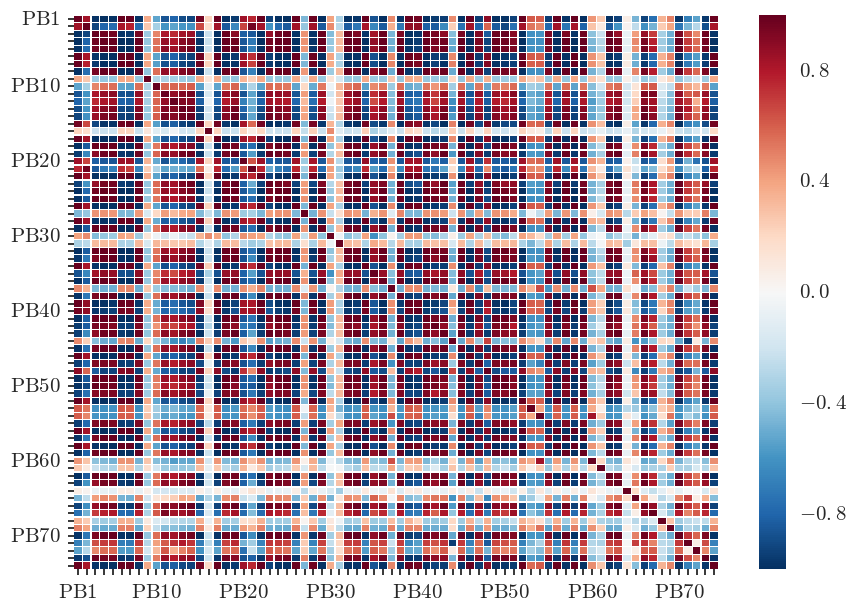

In [6]:
labels = loss_and_profit.columns

def label_chooser(index):
    if index == 0:
        return True
    
    if (i + 1) % 10 == 0:
        return True
    
    return False

labels = [r'$\rm{%s}$' % lab if label_chooser(i) else '' for i, lab in enumerate(labels)]

corr = loss_and_profit.corr()

f, ax = plt.subplots()

def cbar_fmt(x, pos):
    return r'$%s$' % x

sns.heatmap(corr, ax=ax, linewidths=.1, 
            cbar_kws={'format': FuncFormatter(cbar_fmt)})

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=labelsize)

ax.set_xticklabels(labels)
ax.xaxis.set_tick_params(length=4)
ax.xaxis.set_ticks_position('bottom')
for label in ax.get_xticklabels():
    label.set_rotation(0) 

ax.yaxis.set_tick_params(length=4)
ax.set_yticklabels(labels[::-1])

plt.tick_params(axis='both', which='major', labelsize=labelsize)

plt.show()